In [ ]:
##ignore warnings
import warnings
warnings.filterwarnings('ignore')

Loading and understanding the dataset

In [ ]:
# Import necessary libraries for data manipulation, visualization, and model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#import the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("StudentPerformanceFactors.csv")

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


In [ ]:
#Get an overview of the dataset
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

 Perform data cleaning and basic visualization to understand the datase (EDA)

In [ ]:
#identifying all numircal and categorical coloumns
numirc = [col for col in df.columns if df[col].dtype == "int64"]
categ = [col for col in df.columns if df[col].dtype == "object"]

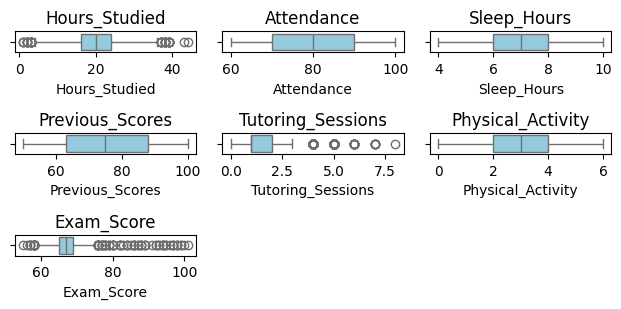

In [ ]:
#detetcting outliers
for i, col in enumerate(numirc, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

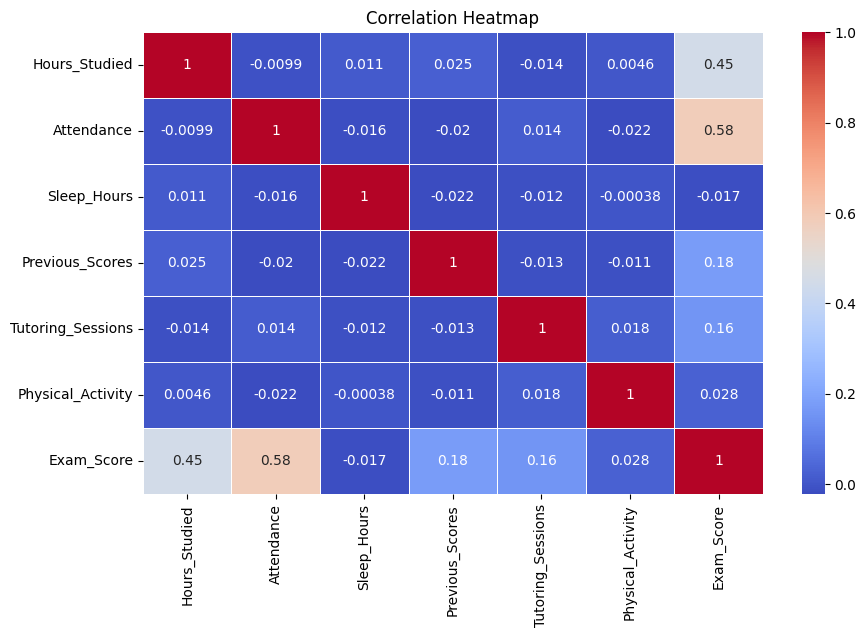

In [ ]:
# Select only numerical columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Heatmap showing correlations between numerical features in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
numeric_data.corr()['Exam_Score'].sort_values(ascending=False)

,Exam_Score
Exam_Score,1.000000
Attendance,0.581072
Hours_Studied,0.445455
Previous_Scores,0.175079
Tutoring_Sessions,0.156525
Physical_Activity,0.027824
Sleep_Hours,-0.017022


In [ ]:
#calculating the outliers
for col in numeric_data:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} outliers: {len(outliers)}")

Hours_Studied outliers: 43
Attendance outliers: 0
Sleep_Hours outliers: 0
Previous_Scores outliers: 0
Tutoring_Sessions outliers: 430
Physical_Activity outliers: 0
Exam_Score outliers: 104


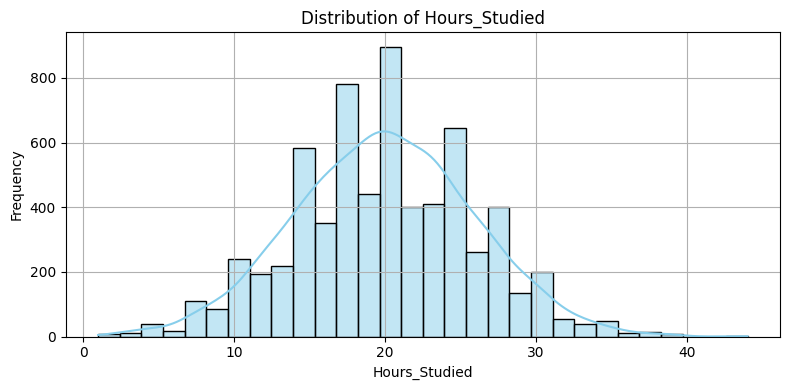

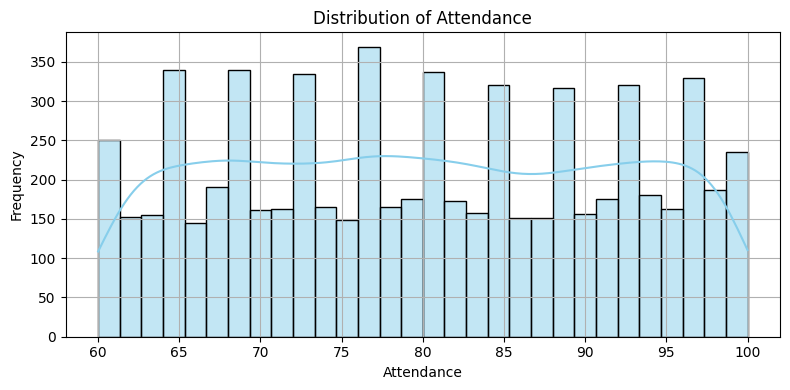

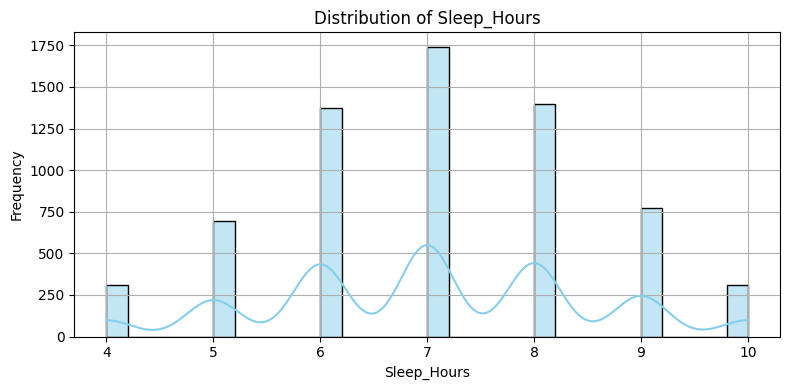

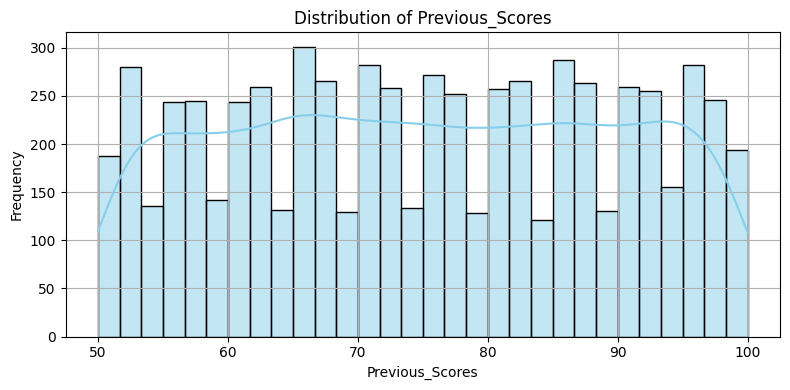

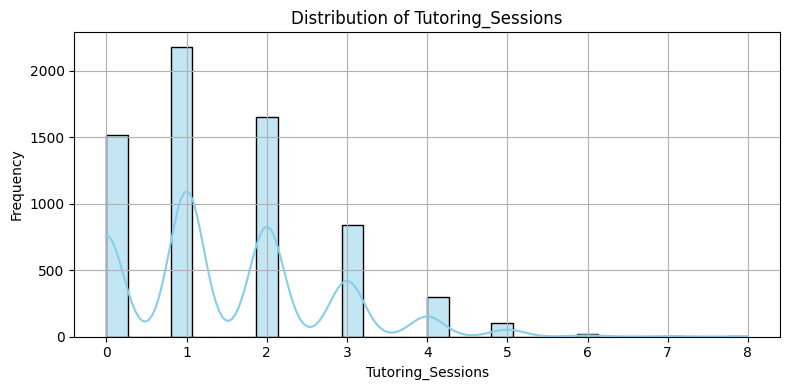

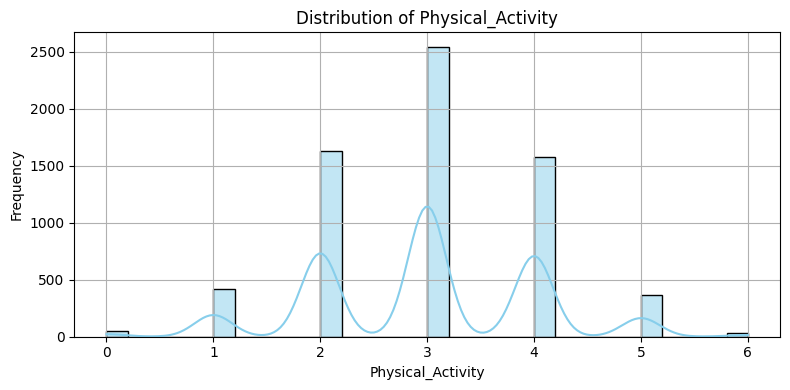

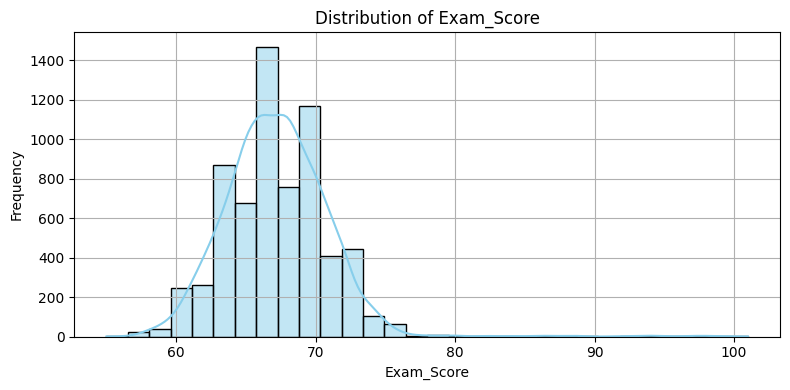

In [ ]:
#Histogram showing the distribution of Numric values with a KDE (Kernel Density Estimate) for smoothing
for col in numeric_data:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
#Showing the value of the skewness in the numric columns
for col in numeric_data:
    skew_val = df[col].skew()
    print(f'{col} skewness: {skew_val:.2f}')

Hours_Studied skewness: 0.01
Attendance skewness: 0.01
Sleep_Hours skewness: -0.02
Previous_Scores skewness: -0.00
Tutoring_Sessions skewness: 0.82
Physical_Activity skewness: -0.03
Exam_Score skewness: 1.64



======================= Teacher_Quality =======================
values before filling
Teacher_Quality
Medium    3925
High      1947
Low        657
NaN         78
Name: count, dtype: int64


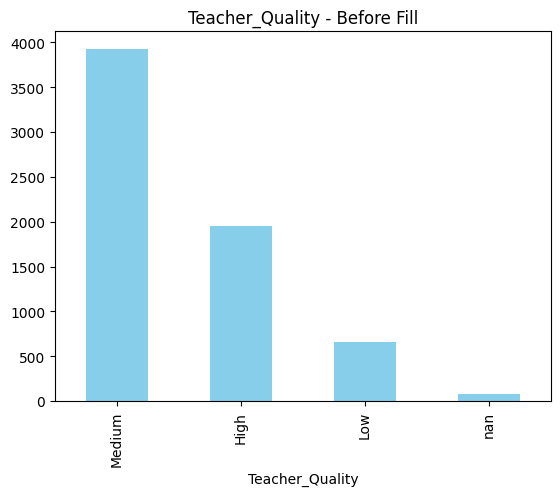

values after filling
Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64


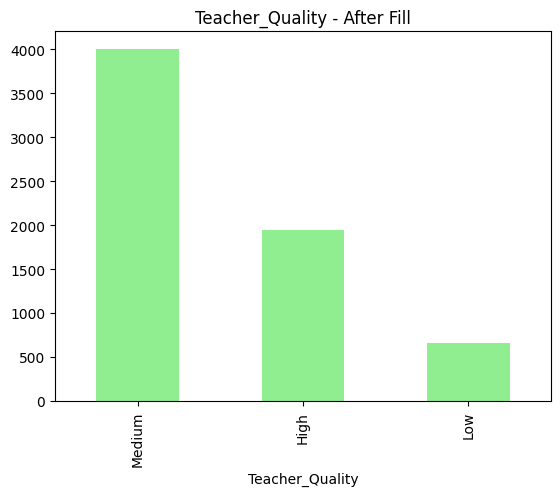


======================= Parental_Education_Level =======================
values before filling
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
NaN               90
Name: count, dtype: int64


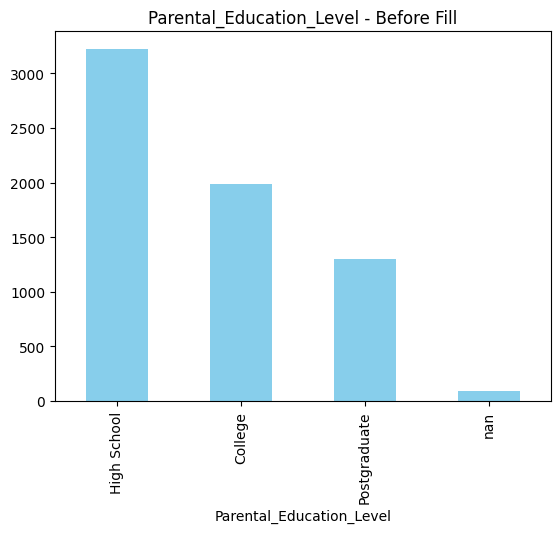

values after filling
Parental_Education_Level
High School     3313
College         1989
Postgraduate    1305
Name: count, dtype: int64


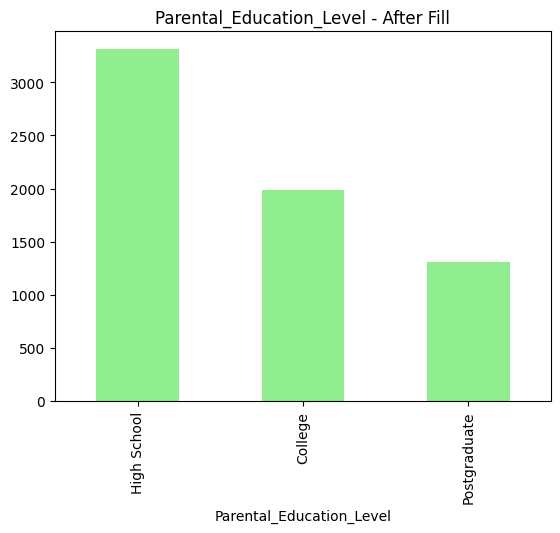


======================= Distance_from_Home =======================
values before filling
Distance_from_Home
Near        3884
Moderate    1998
Far          658
NaN           67
Name: count, dtype: int64


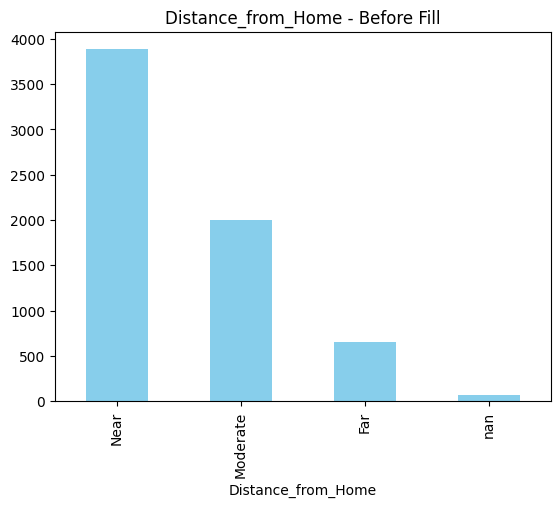

values after filling
Distance_from_Home
Near        3951
Moderate    1998
Far          658
Name: count, dtype: int64


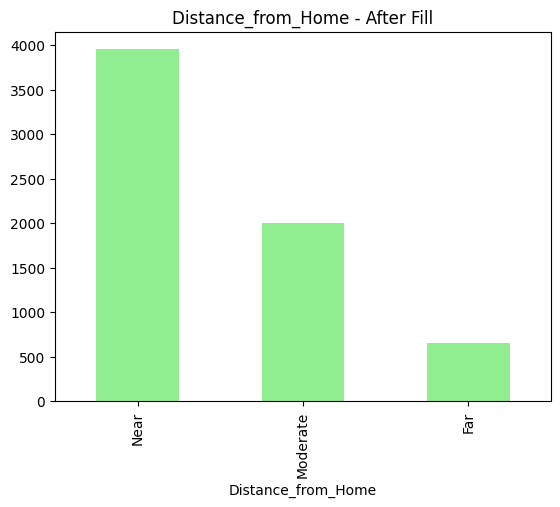

In [ ]:
# Filling missing values in the categorical columns with the most frequent value (mode)

# columns with missing values
cols_with_missing = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

df_copy = df.copy()

for column in cols_with_missing:
    print(f"\n======================= {column} =======================")

    print("values before filling")
    print(df[column].value_counts(dropna=False))

    df[column].value_counts(dropna=False).plot(kind='bar', title=f"{column} - Before Fill", color='skyblue')
    plt.show()

    df[column].fillna(df_copy[column].mode()[0], inplace=True)

    print("values after filling")
    print(df[column].value_counts())


    df[column].value_counts().plot(kind='bar', title=f"{column} - After Fill", color='lightgreen')
    plt.show()


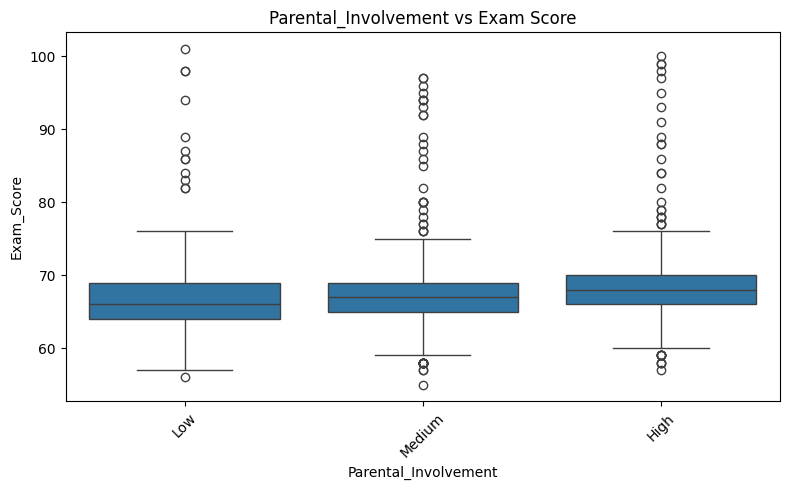

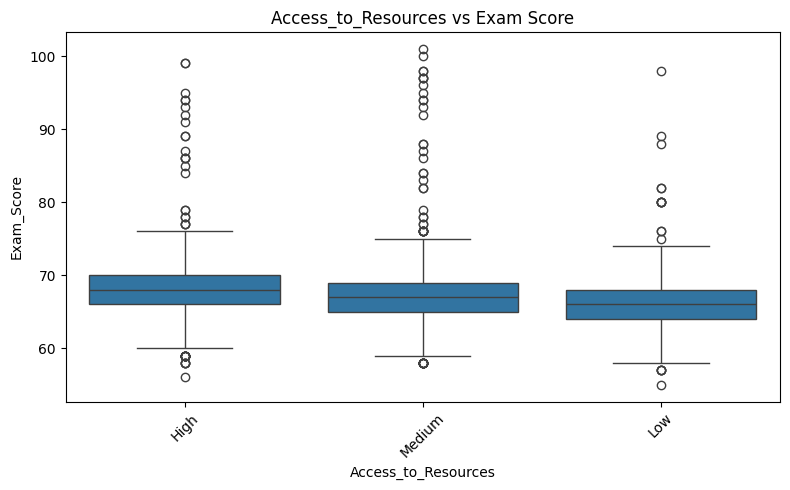

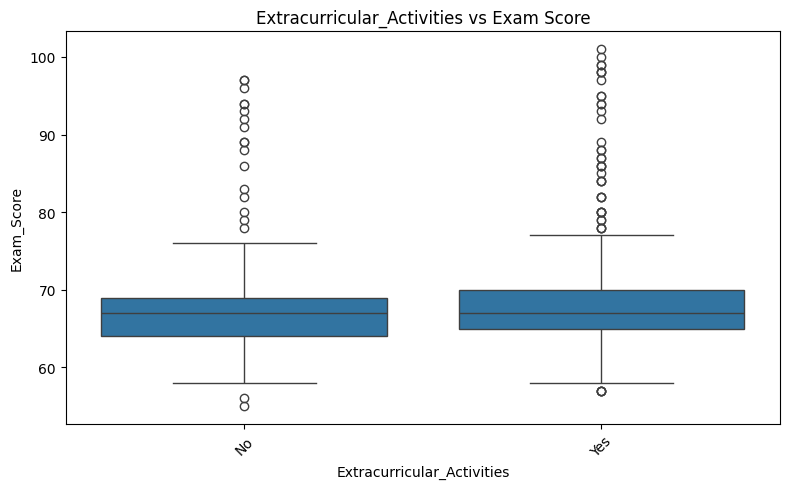

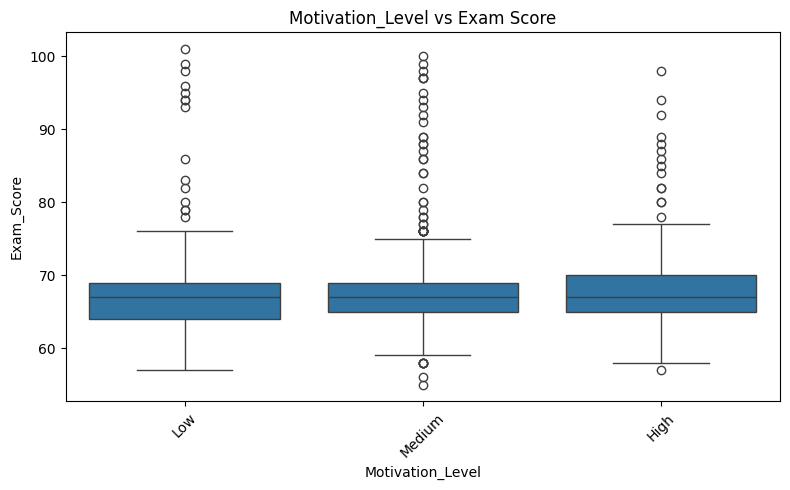

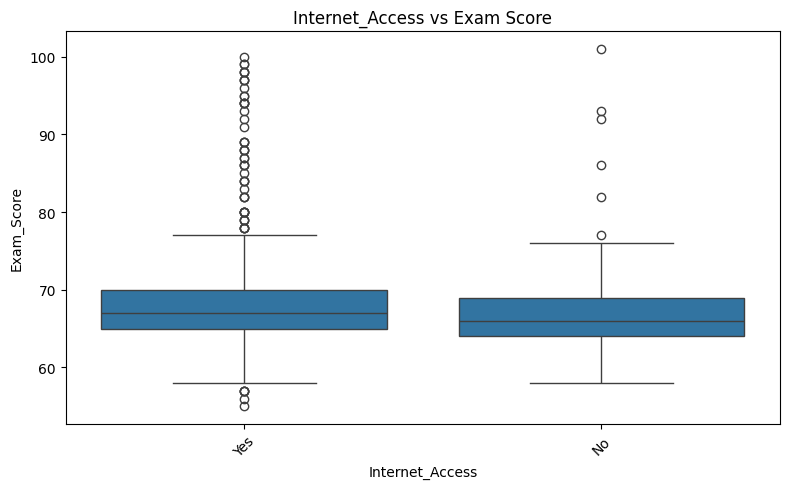

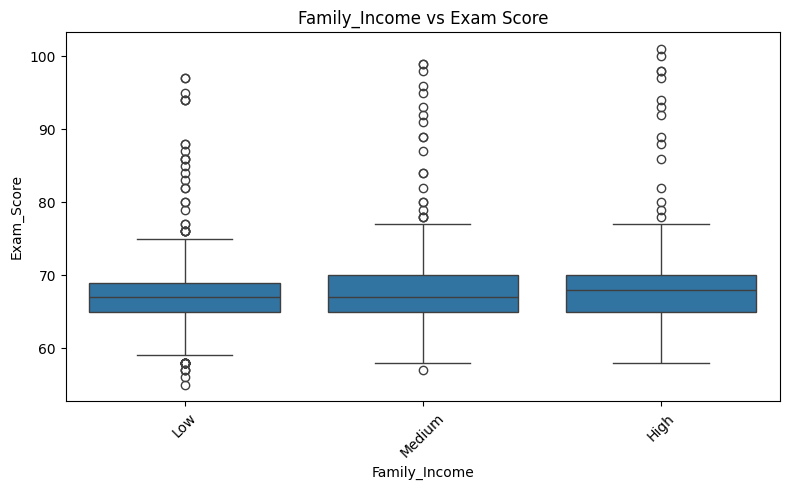

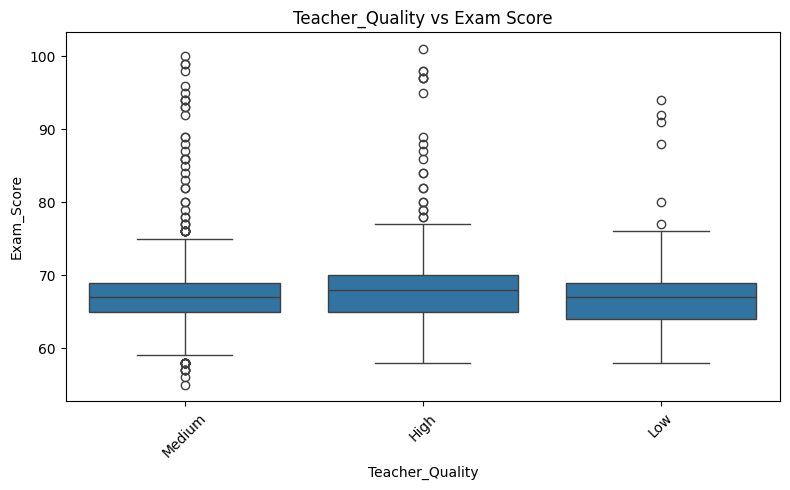

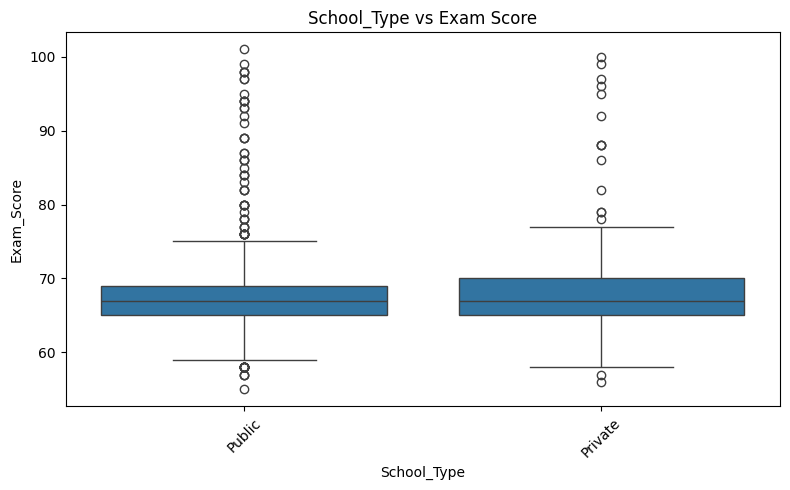

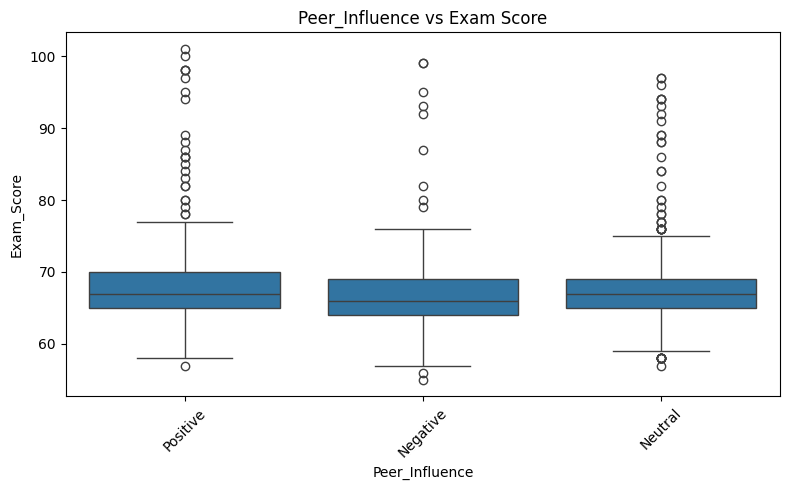

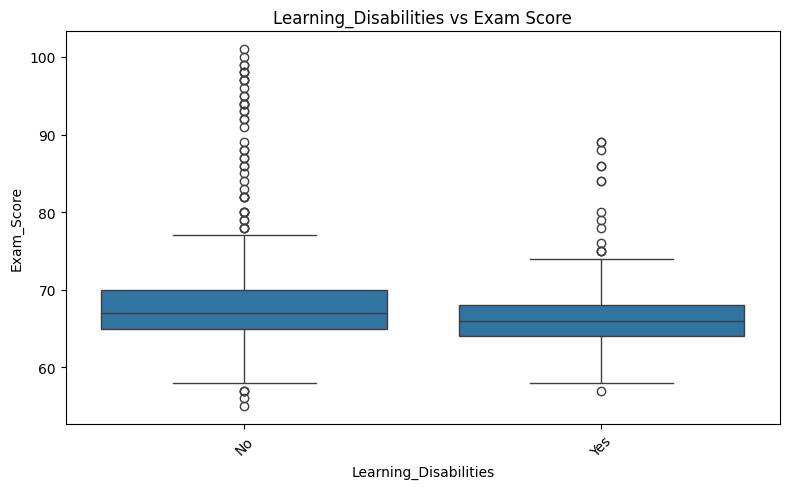

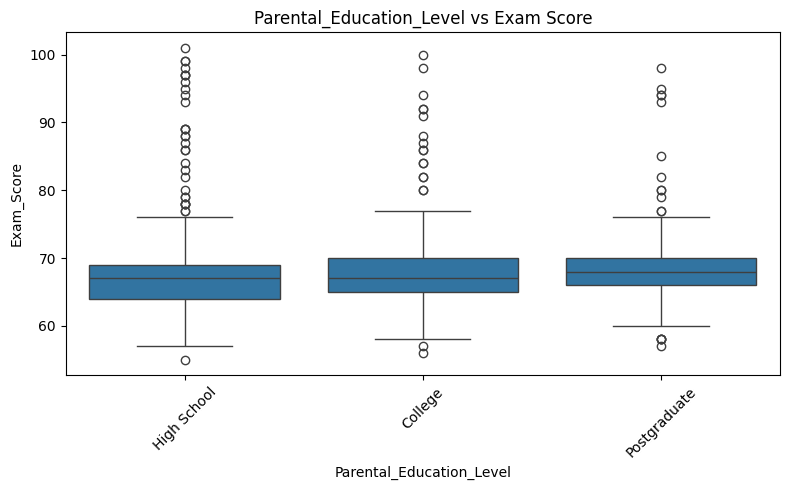

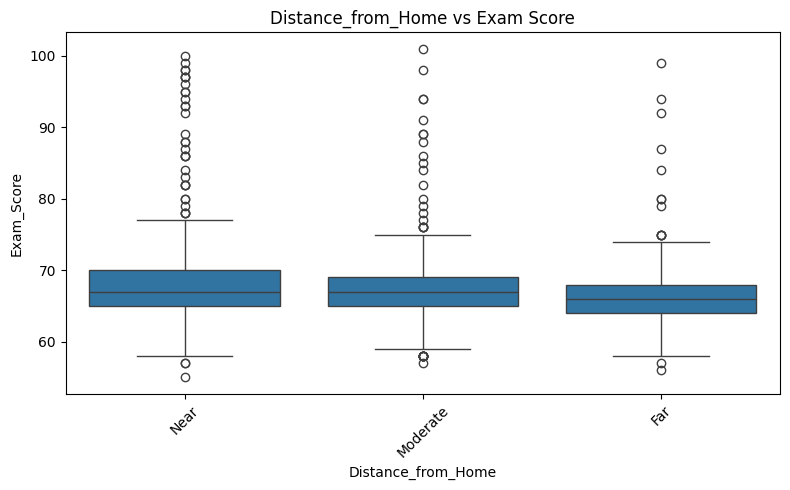

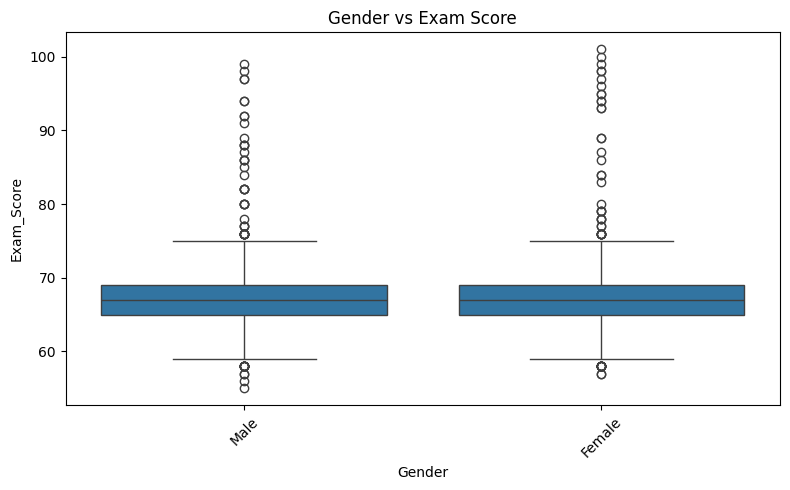

In [ ]:
# Boxplot showing the relationship between Categorical columns and Exam Score
for col in categ:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='Exam_Score', data=df)
    plt.title(f'{col} vs Exam Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#
for col in categ:
    print(df.groupby(col)['Exam_Score'].mean())

Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64
Access_to_Resources
High      68.092152
Low       66.203351
Medium    67.134378
Name: Exam_Score, dtype: float64
Extracurricular_Activities
No     66.931435
Yes    67.441849
Name: Exam_Score, dtype: float64
Motivation_Level
High      67.704321
Low       66.752194
Medium    67.330648
Name: Exam_Score, dtype: float64
Internet_Access
No     66.535070
Yes    67.292895
Name: Exam_Score, dtype: float64
Family_Income
High      67.842396
Low       66.848428
Medium    67.334959
Name: Exam_Score, dtype: float64
Teacher_Quality
High      67.676939
Low       66.753425
Medium    67.100175
Name: Exam_Score, dtype: float64
School_Type
Private    67.287705
Public     67.212919
Name: Exam_Score, dtype: float64
Peer_Influence
Negative    66.564270
Neutral     67.197917
Positive    67.623199
Name: Exam_Score, dtype: float64
Learning_Disabilities
No     67.349120
Yes    66.270504
Name: Exam_Sc

In [ ]:
for col in categ:
  print(df[col].value_counts())
  print(df[col].value_counts(normalize=True))
  print("------------------------------")

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Parental_Involvement
Medium    0.508854
High      0.288785
Low       0.202361
Name: proportion, dtype: float64
------------------------------
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Access_to_Resources
Medium    0.502346
High      0.298925
Low       0.198729
Name: proportion, dtype: float64
------------------------------
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
Extracurricular_Activities
Yes    0.596035
No     0.403965
Name: proportion, dtype: float64
------------------------------
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Motivation_Level
Medium    0.507189
Low       0.293174
High      0.199637
Name: proportion, dtype: float64
------------------------------
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Internet_Access
Yes    0.924474
No     0.0

In [ ]:
import scipy.stats as stats

categorical_columns = df.select_dtypes(include='object').columns

anova_results = {}

# Calculating Anova for each column
for col in categorical_columns:
    groups = [df[df[col] == cat]['Exam_Score'].dropna() for cat in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[col] = p_value

#Dataframe for better visualize
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])
anova_df.sort_values(by='p_value', inplace=True)

print(anova_df)

                                 p_value
Access_to_Resources         1.139299e-42
Parental_Involvement        5.875479e-37
Parental_Education_Level    1.565477e-16
Peer_Influence              1.936891e-15
Family_Income               1.314369e-13
Distance_from_Home          4.093653e-12
Learning_Disabilities       4.338624e-12
Motivation_Level            7.492319e-12
Teacher_Quality             1.953102e-09
Extracurricular_Activities  1.626678e-07
Internet_Access             2.838505e-05
School_Type                 4.723181e-01
Gender                      8.688153e-01


In [ ]:
# calculating the ETA Squared (N2)
from scipy.stats import f_oneway

eta_squared_dict = {}
target = 'Exam_Score'
for feature in categ:
    groups = [df[df[feature] == val][target] for val in df[feature].unique()]
    f_val, p_val = f_oneway(*groups)

    # Eta squared calculation
    grand_mean = df[target].mean()
    ss_total = ((df[target] - grand_mean)**2).sum()
    ss_between = sum([len(g)*(g.mean() - grand_mean)**2 for g in groups])

    eta_squared = ss_between / ss_total
    eta_squared_dict[feature] = eta_squared

# converting to organized DataFrame
eta_df = pd.DataFrame(eta_squared_dict.items(), columns=["Feature", "Eta_Squared"])
eta_df = eta_df.sort_values(by="Eta_Squared", ascending=False)

print(eta_df)

                       Feature  Eta_Squared
1          Access_to_Resources     0.028825
0         Parental_Involvement     0.024948
10    Parental_Education_Level     0.010961
8               Peer_Influence     0.010207
5                Family_Income     0.008942
11          Distance_from_Home     0.007910
3             Motivation_Level     0.007728
9        Learning_Disabilities     0.007236
6              Teacher_Quality     0.006055
2   Extracurricular_Activities     0.004145
4              Internet_Access     0.002650
7                  School_Type     0.000078
12                      Gender     0.000004


In [ ]:
# select the only important columns using SelectKBest

# separate features and target
X = df.drop(columns='Exam_Score').copy()
y = df['Exam_Score']

# Encoding categorical features
le = LabelEncoder()
for col in categ:
    X[col] = le.fit_transform(X[col])

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# showing the result
selected_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(selected_scores)

                       Feature        Score
1                   Attendance  3366.986498
0                Hours_Studied  1635.080039
6              Previous_Scores   208.863214
9            Tutoring_Sessions   165.887652
13              Peer_Influence    67.009326
2         Parental_Involvement    59.247513
3          Access_to_Resources    54.546610
17          Distance_from_Home    52.657480
15       Learning_Disabilities    48.143389
4   Extracurricular_Activities    27.491709
11             Teacher_Quality    24.526039
8              Internet_Access    17.547612
16    Parental_Education_Level    13.149177
14           Physical_Activity     5.117548
10               Family_Income     4.635926
5                  Sleep_Hours     1.914260
7             Motivation_Level     1.468726
12                 School_Type     0.516607
18                      Gender     0.027281


In [ ]:
# the updated datasets using manual selection using visualtion and statistics and SelectKBest

# manulay selected columns
selected_columns = [
   'Hours_Studied',
    'Attendance',
    'Previous_Scores',
    'Access_to_Resources',
    'Parental_Involvement',
    'Parental_Education_Level',
    'Peer_Influence',
    'Family_Income',
    'Distance_from_Home',
    'Motivation_Level',
    'Learning_Disabilities',
    'Teacher_Quality'
]
selected_data = df[selected_columns].copy()

#SelecteKBest columns
kbest_columns = [
    'Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions',
    'Peer_Influence', 'Parental_Involvement', 'Access_to_Resources',
    'Distance_from_Home', 'Learning_Disabilities', 'Extracurricular_Activities',
    'Teacher_Quality', 'Internet_Access'
]
kbest_data = df[kbest_columns].copy()

selected_data.info()
kbest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Hours_Studied             6607 non-null   int64 
 1   Attendance                6607 non-null   int64 
 2   Previous_Scores           6607 non-null   int64 
 3   Access_to_Resources       6607 non-null   object
 4   Parental_Involvement      6607 non-null   object
 5   Parental_Education_Level  6607 non-null   object
 6   Peer_Influence            6607 non-null   object
 7   Family_Income             6607 non-null   object
 8   Distance_from_Home        6607 non-null   object
 9   Motivation_Level          6607 non-null   object
 10  Learning_Disabilities     6607 non-null   object
 11  Teacher_Quality           6607 non-null   object
dtypes: int64(3), object(9)
memory usage: 619.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data column

Encoding, Spliting and Rescaling the Datasets

In [ ]:
selected_data_encoded = pd.get_dummies(selected_data, columns=[col for col in selected_data.select_dtypes(include=['object', 'category']).columns if col in selected_data.columns], drop_first=True)
kBEST_data_encoded = pd.get_dummies(kbest_data, columns=[col for col in kbest_data.select_dtypes(include=['object', 'category']).columns if col in kbest_data.columns], drop_first=True)
copy_data_encoded = pd.get_dummies(df_copy, columns=[col for col in df_copy.select_dtypes(include=['object', 'category']).columns if col in df_copy.columns], drop_first=True)

selected_data_encoded.info()
kBEST_data_encoded.info()
copy_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6607 non-null   int64
 1   Attendance                             6607 non-null   int64
 2   Previous_Scores                        6607 non-null   int64
 3   Access_to_Resources_Low                6607 non-null   bool 
 4   Access_to_Resources_Medium             6607 non-null   bool 
 5   Parental_Involvement_Low               6607 non-null   bool 
 6   Parental_Involvement_Medium            6607 non-null   bool 
 7   Parental_Education_Level_High School   6607 non-null   bool 
 8   Parental_Education_Level_Postgraduate  6607 non-null   bool 
 9   Peer_Influence_Neutral                 6607 non-null   bool 
 10  Peer_Influence_Positive                6607 non-null   bool 
 11  Family_Income_Low             

In [ ]:
# assign X & Y to each dataset
x_s = selected_data_encoded
x_k = kBEST_data_encoded
x_r = copy_data_encoded.drop(columns='Exam_Score')
y = df['Exam_Score']

In [ ]:
# Splitting the data into training and testing sets (80% training, 20% testing)
x_s_train, x_s_test, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=42)
x_k_train, x_k_test, y_train, y_test = train_test_split(x_k, y, test_size=0.2, random_state=42)
x_r_train, x_r_test, y_train, y_test = train_test_split(x_r, y, test_size=0.2, random_state=42)

In [ ]:
scaller = MinMaxScaler()
x_s_train = scaller.fit_transform(x_s_train)
x_s_test = scaller.transform(x_s_test)

x_k_train = scaller.fit_transform(x_k_train)
x_k_test = scaller.transform(x_k_test)

x_r_train = scaller.fit_transform(x_r_train)
x_r_test = scaller.transform(x_r_test)

acc = []

Training, Visualize predictions and evaluate model performance

In [ ]:
# Training a Linear Regression model on the manual selected training data
lr=LinearRegression()
lr.fit(x_s_train ,y_train)

# Making predictions on the test set using the trained Linear Regression model
y_pred1=lr.predict(x_s_test)

# Calculating and printing the mean squared error (MSE) and R² scores for training and test sets
print("mean_squared_error: ",mean_squared_error(y_test, y_pred1))
print("train_score: ",lr.score(x_s_train, y_train))
print("test_score: ",lr.score(x_s_test, y_test))
acc.append(lr.score(x_s_test, y_test))

mean_squared_error:  3.6618937669964424
train_score:  0.6794413010089657
test_score:  0.7409356213788976


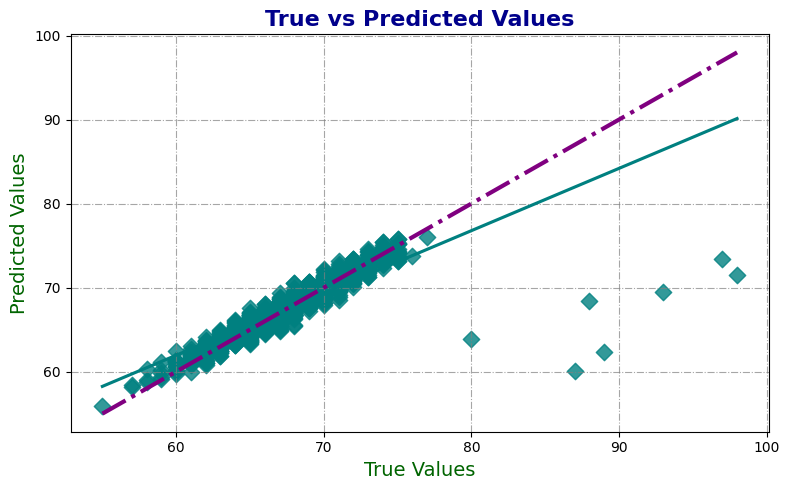

In [ ]:
# Plotting the comparison between True vs Predicted values using a scatter plot and regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred1, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

# Plotting reference line for perfect prediction
max_val = max(max(y_test), max(y_pred1))
min_val = min(min(y_test), min(y_pred1))
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

# Setting plot titles and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('True Values', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

# Adding grid and adjusting layout
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

In [ ]:
# Training a Linear Regression model on the SelectKBest training data
lr=LinearRegression()
lr.fit(x_k_train ,y_train)

# Making predictions on the test set using the trained Linear Regression model
y_pred2=lr.predict(x_k_test)

# Calculating and printing the mean squared error (MSE) and R² scores for training and test sets
print("mean_squared_error: ",mean_squared_error(y_test, y_pred2))
print("train_score: ",lr.score(x_k_train, y_train))
print("test_score: ",lr.score(x_k_test, y_test))
acc.append(lr.score(x_k_test, y_test))

mean_squared_error:  3.710444204514521
train_score:  0.6869568227231224
test_score:  0.7375008715669935


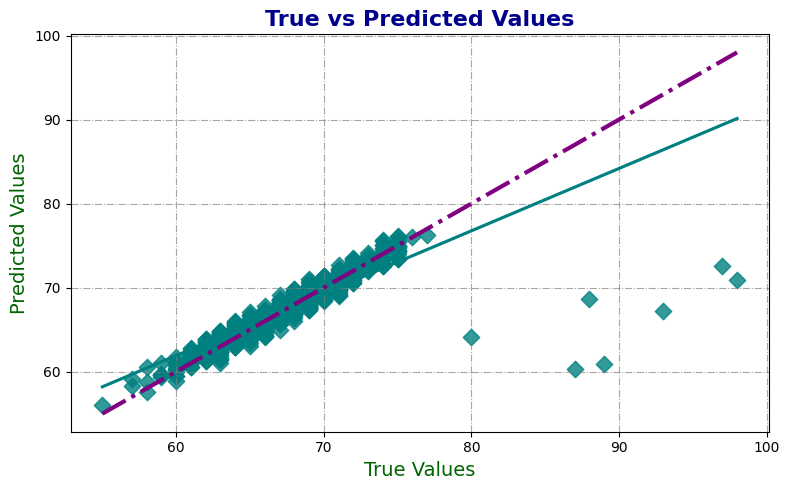

In [ ]:
# Plotting the comparison between True vs Predicted values using a scatter plot and regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred2, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

# Plotting reference line for perfect prediction
max_val = max(max(y_test), max(y_pred2))
min_val = min(min(y_test), min(y_pred2))
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

# Setting plot titles and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('True Values', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

# Adding grid and adjusting layout
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

In [ ]:
# Training a Linear Regression model on the Raw training data
lr=LinearRegression()
lr.fit(x_r_train ,y_train)

# Making predictions on the test set using the trained Linear Regression model
y_pred3=lr.predict(x_r_test)

# Calculating and printing the mean squared error (MSE) and R² scores for training and test sets
print("mean_squared_error: (MSE)",mean_squared_error(y_test, y_pred3))
print("train_score: (R²)",lr.score(x_r_train, y_train))
print("test_score: (R²)",lr.score(x_r_test, y_test))
acc.append(lr.score(x_r_test, y_test))

mean_squared_error: (MSE) 3.256695866435405
train_score: (R²) 0.7169978610428089
test_score: (R²) 0.7696017567194432


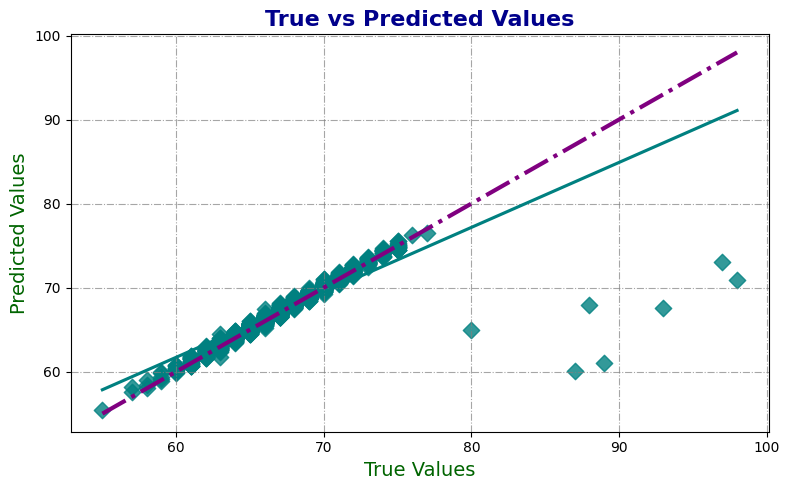

In [ ]:
# Plotting the comparison between True vs Predicted values using a scatter plot and regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred3, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

# Plotting reference line for perfect prediction
max_val = max(max(y_test), max(y_pred3))
min_val = min(min(y_test), min(y_pred3))
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

# Setting plot titles and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('True Values', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

# Adding grid and adjusting layout
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

In [ ]:

#Using Polynomial Regression With Highest acc dataset (Raw dataset) (Degree 2 as default)
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_r_train)
x_poly_test = poly.transform(x_r_test)

# 2. Model Training
lr = LinearRegression()
lr.fit(x_poly_train, y_train)

# 3. Predict on test set
y_pred_poly = lr.predict(x_poly_test)

# Calculating and printing the mean squared error (MSE) and R² scores for training and test sets
print("mean_squared_error: (MSE)",mean_squared_error(y_test, y_pred_poly))
print("train_score: (R²)",lr.score(x_poly_train, y_train))
print("test_score: (R²)",lr.score(x_poly_test, y_test))
acc.append(lr.score(x_poly_test, y_test))

mean_squared_error: (MSE) 3.571328969394286
train_score: (R²) 0.7369201239101095
test_score: (R²) 0.7473427195932711


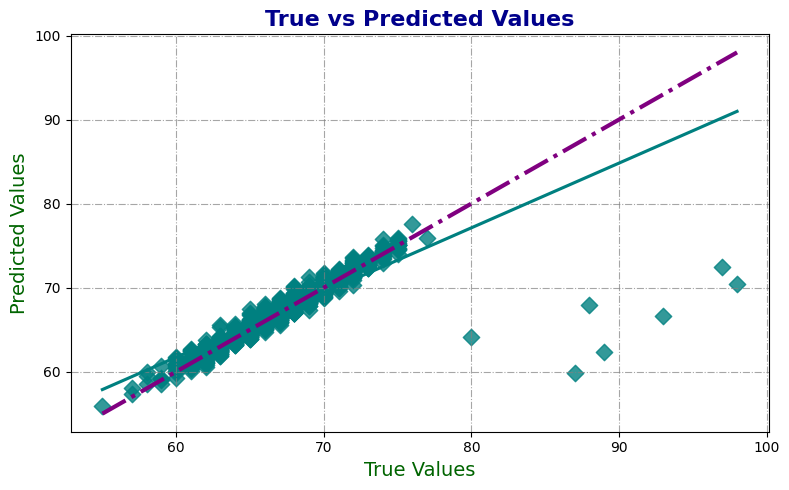

In [ ]:
# Plotting the comparison between True vs Predicted values using a scatter plot and Polynomial regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred_poly, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

# Plotting reference line for perfect prediction
max_val = max(max(y_test), max(y_pred_poly))
min_val = min(min(y_test), min(y_pred_poly))
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

# Setting plot titles and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('True Values', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

# Adding grid and adjusting layout
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

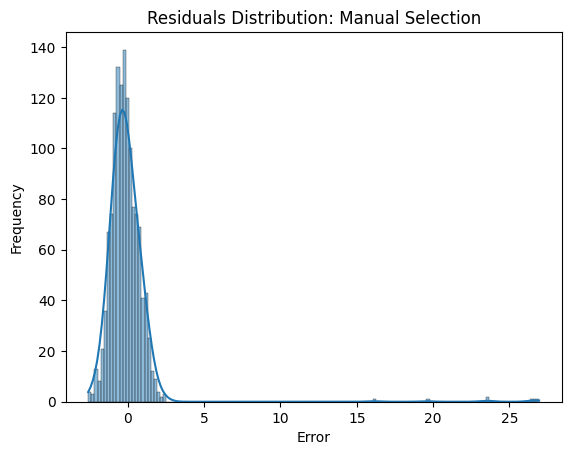

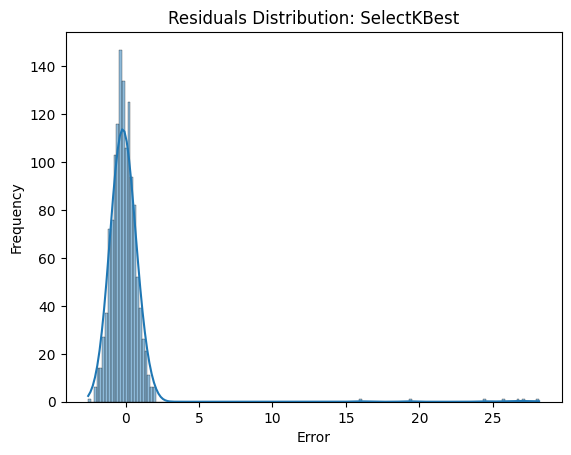

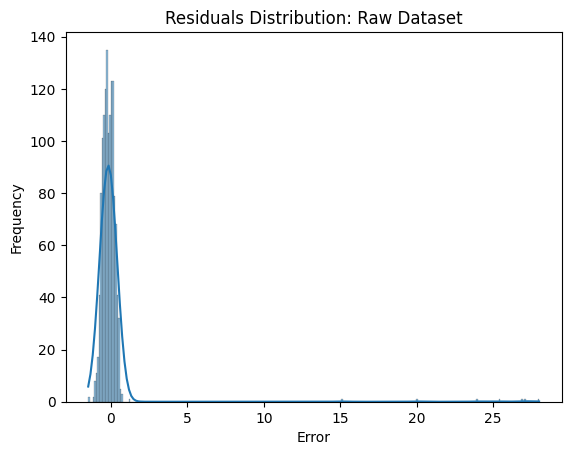

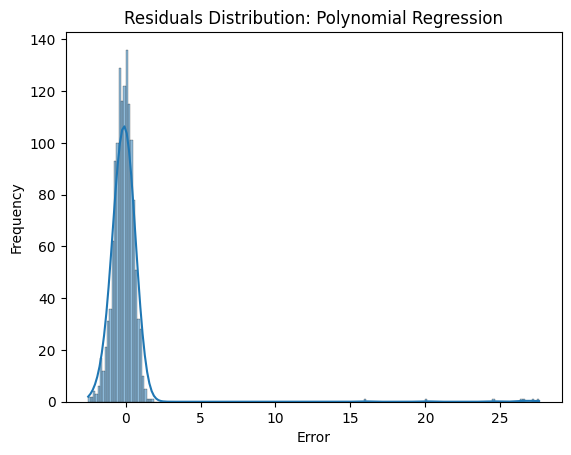

In [ ]:
pred_list = [y_pred1, y_pred2, y_pred3, y_pred_poly]
pred_names = ["Manual Selection", "SelectKBest", "Raw Dataset", "Polynomial Regression"]

for pred, name in zip(pred_list, pred_names):
    residuals = y_test - pred
    sns.histplot(residuals, kde=True)
    plt.title(f"Residuals Distribution: {name}")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()


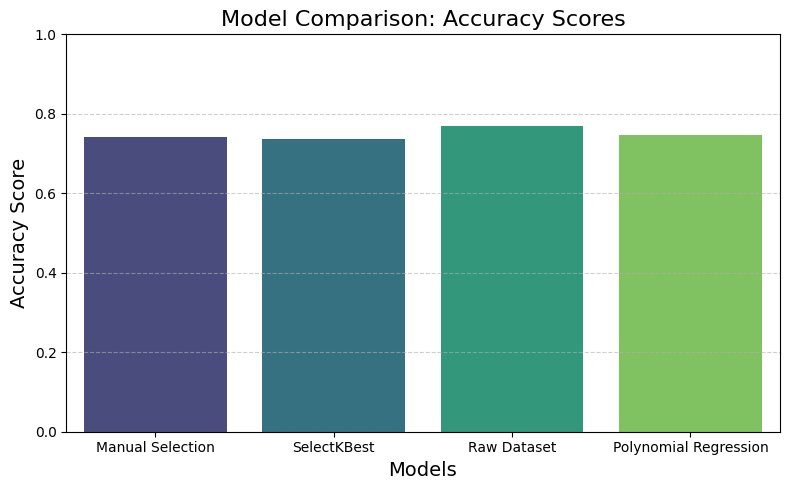

In [ ]:
# Plotting the accuracy scores of the models
plt.figure(figsize=(8, 5))
sns.barplot(x=pred_names, y=acc, palette='viridis')
plt.title('Model Comparison: Accuracy Scores', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
# Setting y-axis limit and grid
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()